# Outlier Analysis

## Catching outliers

In [1]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df = df.select_dtypes(["int64", "float64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df.table

In [3]:
df_table.tail()

53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, dtype: float64

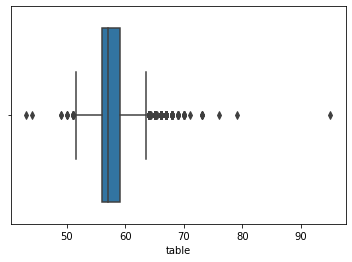

In [4]:
sns.boxplot(x=df_table);

In [5]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1
IQR

3.0

In [6]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [7]:
outliers = (df_table < lower_bound) | (df_table > upper_bound)
outliers

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

## Deal with Outliers

##### There are 3 common methods to deal with outliers.

### 1) Clearing

In [8]:
import pandas as pd

In [9]:
df_table = pd.DataFrame(df_table)

In [10]:
df_table.shape

(53940, 1)

In [11]:
clc_df = df_table[~((df_table < lower_bound) | (df_table > upper_bound)).any(axis=1)]

In [12]:
clc_df.shape

(53335, 1)

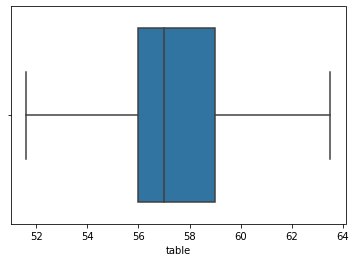

In [13]:
sns.boxplot(x=clc_df.table);

### 2) Filling with Mean 

In [14]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df = df.select_dtypes(["int64", "float64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [15]:
df_table = df.table

In [16]:
outliers = (df_table < lower_bound) | (df_table > upper_bound)

In [17]:
clm_df = df_table.copy()

In [18]:
df_table.mean()

57.45718390804603

In [19]:
clm_df[outliers] = df_table.mean()

In [20]:
clm_df[outliers]

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64

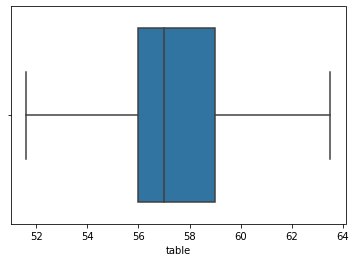

In [21]:
sns.boxplot(x=clm_df);

### 3) Suppression Method

In [14]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df = df.select_dtypes(["int64", "float64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [15]:
df_table = df.table

In [23]:
df_table[outliers]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [63]:
cls_table = df_table.copy()

In [65]:
lower_outliers = df_table < lower_bound

In [66]:
upper_outliers = df_table > upper_bound

In [67]:
cls_table[lower_outliers] = lower_bound
cls_table[upper_outliers] = upper_bound

In [68]:
cls_table

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

<AxesSubplot:xlabel='table'>

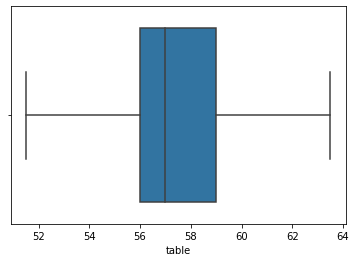

In [69]:
sns.boxplot(x=cls_table)